In [1]:
# Importing modules
import pandas as pd
import numpy as np
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Retreive Dataset, save into df variable
df=pd.read_csv('dataset/fake_job_postings.csv')

Data Exploration

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# How many rows and column in dataset
df.shape

(17880, 18)

In [5]:
# How many null values in respective columns
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
# Drop useless columns
df=df.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1)


In [7]:
df.shape

(17880, 13)

Null Values evaluation

In [8]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
df=df.drop(['department'],axis=1)
df.isnull().sum()

title                     0
location                346
company_profile        3308
description               1
requirements           2695
benefits               7210
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [10]:
# Filling null values with empty string
df.fillna('',inplace=True)

In [11]:
df.head()

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


Check for balance imbalance data in label column

In [12]:
Y=df['fraudulent']

<AxesSubplot: ylabel='fraudulent'>

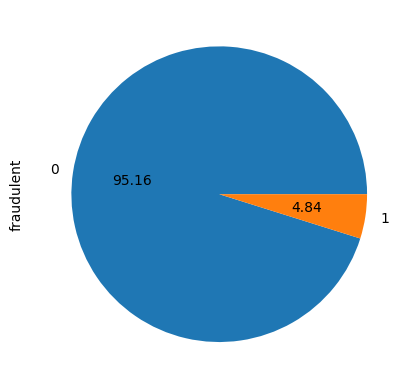

In [13]:
Y.value_counts().plot.pie(autopct='%.2f')

In [14]:
X = df.drop(['fraudulent'], axis=1)

In [15]:
X.head()

,title,location,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Other,Internship,,,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


In [16]:
# Merge all columns into text column from X
df['text']=''
for col in X:
    df['text']=df['text']+' '+df[col]

In [17]:
for col in X:
    if not col == 'text':
        del df[col]

In [18]:
# Modified Shape of Dataset 
df.head()
df['text'][98]

" IC&E Technician US, , Stocton, CA \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0Staffing &amp; Recruiting done right for the Oil &amp; Energy Industry!Represented candidates are automatically granted the following perks: Expert negotiations on your behalf, maximizing your compensation package and implimenting ongoing increases\xa0Significant signing bonus by Refined Resources (in addition to any potential signing bonuses our client companies offer)1 Year access to AnyPerk: significant corporate discounts on cell phones, event tickets, house cleaning and everything inbetween. \xa0You'll save thousands on daily expenditures\xa0Professional Relocation Services for out of town candidates* All candidates are encouraged to participate in our Referral Bonus Program ranging anywhere from $500 - $1,000 for all successfully hired candidat

In [19]:

df['text_len']= df['text'].str.len()

In [20]:
df.head()


,fraudulent,text,text_len
0,0,"Marketing Intern US, NY, New York We're Food5...",2709
1,0,"Customer Service - Cloud Video Production NZ,...",6218
2,0,"Commissioning Machinery Assistant (CMA) US, I...",2660
3,0,"Account Executive - Washington DC US, DC, Was...",5551
4,0,"Bill Review Manager US, FL, Fort Worth SpotSo...",4058


# Data preprocessing 

In [21]:
# Data preprocessing (Text preprocessing) includes:-
#  1-Stop-Words Removal
#  2-Punctuation Removal
#  3-Numerical Removal
#  4-Stemming
#  5-Case Normalization

In [22]:
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()


In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Usman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

User Defined func

In [24]:

def tokenize(text):  # convert text into tokens
    return word_tokenize(text.lower())
english_stopwords = stopwords.words('english')

def clean_text(text): # expecting tokenize sentence
    filterText=''
    for token in text:
        if token not in english_stopwords and token.isalnum() and not token.isnumeric():
                filterText+=lemmatizer.lemmatize(token, pos ="a")+' '
        
    return filterText   


In [25]:
# Normalize text
count=0
for text in df['text']:
    df.loc[count,['text']] = [clean_text(tokenize(text))]
    count=count+1

In [26]:
df['text'][98]

'ic e technician us stocton ca staffing amp recruiting done right oil amp energy industry represented candidates automatically granted following perks expert negotiations behalf maximizing compensation package implimenting ongoing increases significant signing bonus refined resources addition potential signing bonuses client companies offer year access anyperk significant corporate discounts cell phones event tickets house cleaning everything inbetween save thousands daily expenditures professional relocation services town candidates candidates encouraged participate referral bonus program ranging anywhere successfully hired candidates referred directly refined resources teamplease submit referrals via online referral formthank look forward working soon click enlarge image ic amp e technician bakersfield ca mt posoprincipal duties responsibilities calibrates tests maintains troubleshoots installs power plant instrumentation control systems electrical maintenance motor control centers m

In [27]:
Y=df['fraudulent']

In [28]:
del df['fraudulent']


In [29]:
df.head()

,text,text_len
0,marketing intern us ny new york food52 created...,2709
1,customer service cloud video production nz auc...,6218
2,commissioning machinery assistant cma us ia we...,2660
3,account executive washington dc us dc washingt...,5551
4,bill review manager us fl fort worth spotsourc...,4058


Feature Extraction using TF-IDF

In [30]:
tfidf = TfidfVectorizer(max_features=1000)
result = tfidf.fit_transform(df['text'])
result

<17880x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1794324 stored elements in Compressed Sparse Row format>

In [31]:
pickle.dump(tfidf, open('./Models/tf-idf.pkl', 'wb'))

In [32]:
b=np.array(df['text_len'])
myArr=[]
for item in b:
    myArr.append([item])
len(myArr)

17880

In [33]:

import scipy as sp
result.shape

(17880, 1000)

In [34]:
final = sp.sparse.hstack((result, myArr),dtype=float)
final.shape

(17880, 1001)

In [35]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64

Balance Dataset using ADASYN

In [36]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(final, Y)

<AxesSubplot: ylabel='fraudulent'>

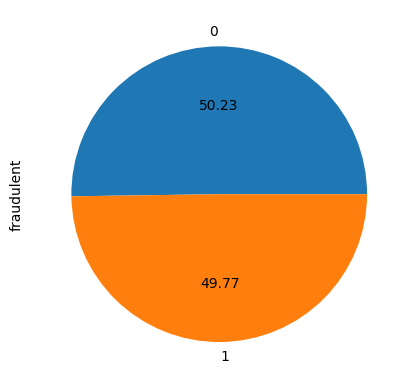

In [37]:
y_res.value_counts().plot.pie(autopct='%.2f')

In [38]:
y_res

0        0
1        0
2        0
3        0
4        0
        ..
33870    1
33871    1
33872    1
33873    1
33874    1
Name: fraudulent, Length: 33875, dtype: int64

Spliting into training and testing

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res, test_size = 0.3, stratify=y_res, random_state=2)

# RFC

In [40]:
x_train.shape

(23712, 1001)

In [41]:
x_test.shape

(10163, 1001)

In [42]:
clf = RandomForestClassifier(n_estimators=300,max_depth=300, random_state=5)
model=clf.fit(x_train, y_train)

In [43]:
# Dump RFC model into file using picke
pickle.dump(model, open('./Models/rfc.pkl', 'wb'))

In [44]:
mytext=['ic e technician us stocton ca staffing amp recruiting done right oil amp energy industry represented candidates automatically granted following perks expert negotiations behalf maximizing compensation package implimenting ongoing increases significant signing bonus refined resources addition potential signing bonuses client companies offer year access anyperk significant corporate discounts cell phones event tickets house cleaning everything inbetween save thousands daily expenditures professional relocation services town candidates candidates encouraged participate referral bonus program ranging anywhere successfully hired candidates referred directly refined resources teamplease submit referrals via online referral formthank look forward working soon click enlarge image ic amp e technician bakersfield ca mt posoprincipal duties responsibilities calibrates tests maintains troubleshoots installs power plant instrumentation control systems electrical maintenance motor control centers motor operated valves generators excitation equipment preventive predictive corrective maintenance equipment coordinating work various team installs new equipment system performs maintenance dc backup power equipment process controls programmable logic controls plc emission monitoring maintenance reporting system record time material use problem identified corrected action required provides complete history maintenance coordinate work monitor contractors specific tasks safe working practices safety hazards recommends environmental compliance work environmental problems assist implementing team members works departments support generating station achieving performance team members areas instrumentation control electrical housekeeping assignments equipment system tagging according company plant rules equipment safety inspections required record results appropriate participate small construction projects read interpret drawings sketches prints specifications parts needed affect maintenance operations tasks basis tasks within reasonable response time emergency overtime plus provide acceptable contact phone company pager excellent verbal written communications skills ability coordinate work activities team members technical subjects across job work weekends holidays rotating shifts required qualificationsknowledge skills amp abilities high school diploma ged required must valid driver license ability read write communicate effectively english good math skills four years experience amp c technician electrician power plant environment preferably strong electrical background including voltages kv provide following demonstrated knowledge electrical equipment electronics schematics basics chemistry physics controls knowledge safe work practices associated power plant ability calibrate amp c systems equipment including analytic ability configure operate various test instruments equipment necessary troubleshoot repair plant equipment including limited distributed control systems programmable logic controllers motor control centers transformers generators continuous emissions monitor cem ability work others team environment benefitswhat offered competitive compensation package100 matched retirement fundannual vacations paid companysignificant bonus structureopportunity advancement full benefits packageannual performance reviews base salary increasesannual cost living increases sound clean safe enjoyable working environment amp company cultureworld renound management executive team promote within leverage careers invest employees success careers overall goalsqualified candidates contact darren lawson vp recruiting level high school equivalent oil energy '
]

In [45]:
tf=pickle.load(open('./Models/tf-idf.pkl', 'rb'))
a=tf.transform(mytext)
b=5263
final = sp.sparse.hstack((a, [b]),dtype=float)
final.shape

(1, 1001)

In [46]:
pred=model.predict(final)
pred

array([1], dtype=int64)

In [47]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

Classification Report


ValueError: Found input variables with inconsistent numbers of samples: [10163, 1]

# LR

In [ ]:
clf = LogisticRegression(random_state=52,multi_class='multinomial',C = 3.0)
model=clf.fit(x_train, y_train)

In [ ]:
# Dump LR model into file using picke
pickle.dump(model, open('./Models/lr.pkl', 'wb'))

In [ ]:
pred=model.predict(x_test)
score=accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

# SVM

In [ ]:
clf = svm.SVC()
model=clf.fit(x_train, y_train)

In [ ]:
# Dump SVC model into file using picke
pickle.dump(model, open('./Models/svm.pkl', 'wb'))

In [ ]:
pred=model.predict(x_test)
score=accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

# KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=6,weights='uniform')
model=neigh.fit(x_train, y_train)

In [ ]:
# Dump SVC model into file using picke
pickle.dump(model,  open('./Models/knn.pkl', 'wb'))

In [ ]:
pred=neigh.predict(x_test)
score=accuracy_score(y_test,pred)
score

In [ ]:
print("Classification Report")
print(classification_report(y_test, pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, pred))

In [ ]:
# Retreive Dataset, save into df variable
df=pd.read_csv('dataset/fake_job_postings.csv')

In [ ]:
df